# Import the libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
import pandas as pd
import numpy as np
import os
import cv2
import keras
import random
from keras import layers

# Import the image dataset for training

In [2]:
#get the location of the training, testing, and validation images
TRAIN_DATADIR = "C:/Users/TOSHIBA_2/Documents/College/3rd - First Sem/Machine Learning/Codes/Learning Evidence/Fold1/Train"
TEST_DATADIR = "C:/Users/TOSHIBA_2/Documents/College/3rd - First Sem/Machine Learning/Codes/Learning Evidence/Fold1/Test"
VAL_DATADIR = "C:/Users/TOSHIBA_2/Documents/College/3rd - First Sem/Machine Learning/Codes/Learning Evidence/Fold1/Val"

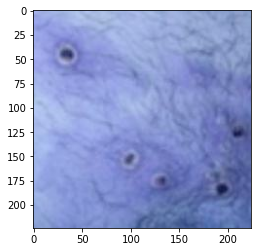

In [3]:
#there are two folders in the train folder
CATEGORIES = ['Monkeypox', 'Others']

#for every image, divide them per category
for category in CATEGORIES:
    path = os.path.join(TRAIN_DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        plt.show()
        break
    break

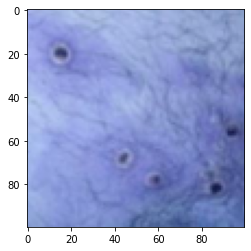

In [4]:
#resize the images for normalizaiton
IMG_SIZE = 100
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [5]:
#define a function for creating a training set
def create_data(DATADIR, data_array):
    for i in range(len(CATEGORIES)):
        category = CATEGORIES[i]
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data_array.append([new_array, class_num])
            except Exception as e:
                pass

In [6]:
#create a training set
training_data = []
create_data(TRAIN_DATADIR, training_data)

#testing set
testing_data = []
create_data(TEST_DATADIR, testing_data)

#validation set
val_data = []
create_data(VAL_DATADIR, val_data)

In [7]:
#print the length of the all the data
print("Training data:\t\t", len(training_data), "\nTesting data:\t\t", len(testing_data), "\nValidation data:\t", len(val_data))

Training data:		 2142 
Testing data:		 45 
Validation data:	 420


In [8]:
#check the stratification of images for training data
def check_count(data_array):
    count_monkeypox = 0
    count_others = 0
    for image in data_array:
        if image[1] == 0:
            count_monkeypox += 1
        else:
            count_others += 1
    return count_monkeypox, count_others

In [9]:
#print the count for every set of data
count_train = check_count(training_data)
count_test = check_count(testing_data)
count_val = check_count(val_data)
print('Training data\nMonkeypox: {} \t\tOthers: {}'.format(count_train[0], count_train[1]), '\t\tAll:', count_train[0]+count_train[1])
print('\nTesting data\nMonkeypox: {} \t\tOthers: {}'.format(count_test[0], count_test[1]), '\t\tAll:', count_test[0]+count_test[1])
print('\nValidation data\nMonkeypox: {} \t\tOthers: {}'.format(count_val[0], count_val[1]), '\t\tAll:', count_val[0]+count_val[1])

Training data
Monkeypox: 980 Others: 1162

Testing data
Monkeypox: 20 Others: 25

Validation data
Monkeypox: 168 Others: 252


In [10]:
#shuffle the images
random.shuffle(training_data)

#print out the first 10 images from the shuffle
for sample in training_data[:10]:
    print(sample[1])

1
0
1
1
0
0
0
1
1
1


In [11]:
#divide into features and target values (or labels) for training data
X_train = []
y_train = []

for features, label in training_data:
    X_train.append(features)
    y_train.append(label)
    
X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

#use pickle to reduce repeated data generation
pickle_out = open('X_train.pickle', 'wb')
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open('y_train.pickle', 'wb')
pickle.dump(y_train, pickle_out)
pickle_out.close()

#for insertion of pickled file again
pickle_in = open('X_train.pickle', 'rb')
X_train = pickle.load(pickle_in)

In [12]:
#divide into features and target values (or labels) for testing data
X_test = []
y_test = []

for features, label in testing_data:
    X_test.append(features)
    y_test.append(label)
    
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

#use pickle to reduce repeated data generation
pickle_out = open('X_test.pickle', 'wb')
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open('y_test.pickle', 'wb')
pickle.dump(y_test, pickle_out)
pickle_out.close()

#for insertion of pickled file again
pickle_in = open('X_test.pickle', 'rb')
X_test = pickle.load(pickle_in)